# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [66]:
# Set the API base URL
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size= 50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size= 50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 44


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | almeirim
Processing Record 5 of Set 1 | luwuk
Processing Record 6 of Set 1 | saudarkrokur
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | ponta delgada
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | sandnessjoen
Processing Record 13 of Set 1 | sansanne-mango
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | darzab
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | weyburn
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Se

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          41
Lat           41
Lng           41
Max Temp      41
Humidity      41
Cloudiness    41
Wind Speed    41
Country       41
Date          41
dtype: int64

In [73]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,32.02,93,100,17.27,GL,1697224348
1,edinburgh of the seven seas,-37.0676,-12.3116,59.31,95,100,29.10,SH,1697224332
2,port mathurin,-19.6833,63.4167,72.66,72,24,12.48,MU,1697224330
3,almeirim,-1.5233,-52.5817,98.85,32,82,6.06,BR,1697224299
4,luwuk,-0.9516,122.7875,75.54,79,39,4.25,ID,1697224554


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/outcities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,32.02,93,100,17.27,GL,1697224348
1,edinburgh of the seven seas,-37.0676,-12.3116,59.31,95,100,29.10,SH,1697224332
2,port mathurin,-19.6833,63.4167,72.66,72,24,12.48,MU,1697224330
3,almeirim,-1.5233,-52.5817,98.85,32,82,6.06,BR,1697224299
4,luwuk,-0.9516,122.7875,75.54,79,39,4.25,ID,1697224554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

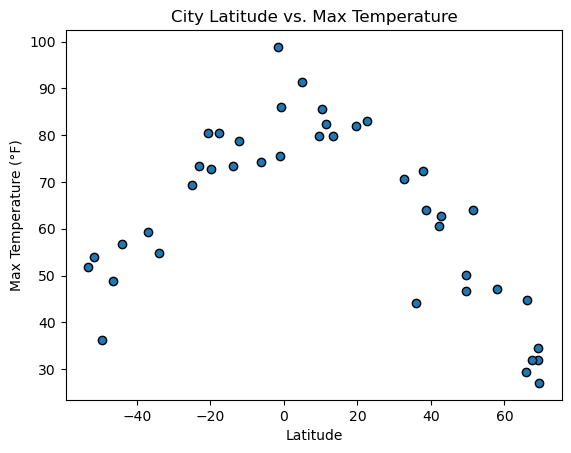

In [119]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

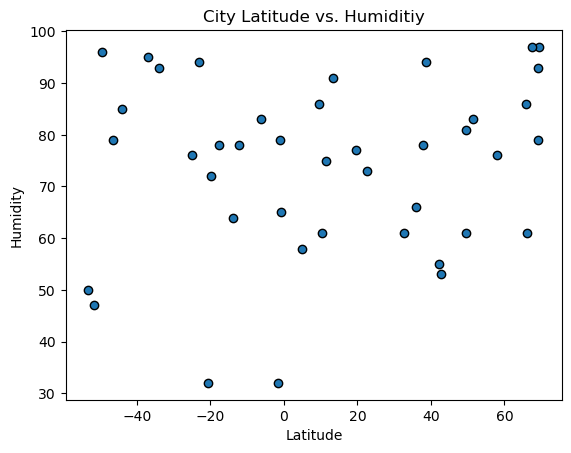

In [124]:
# Build the scatter plots for latitude vs. humidity
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humiditiy")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

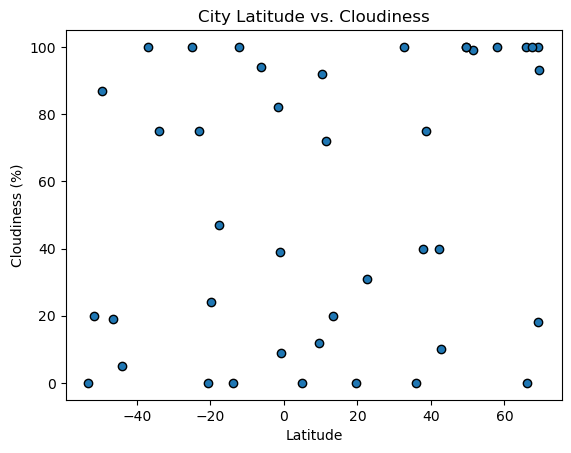

In [125]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

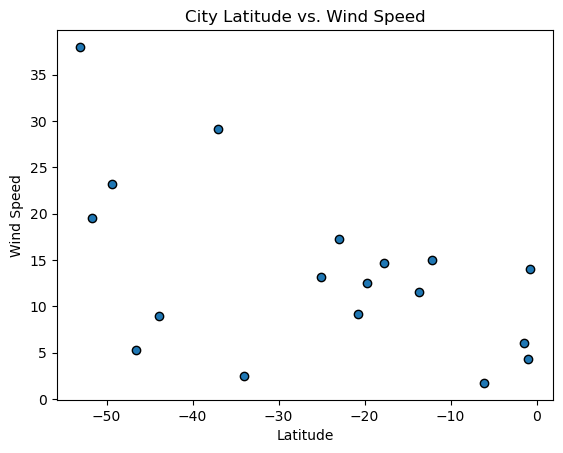

In [130]:
# Build the scatter plots for latitude vs. humidity
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,32.02,93,100,17.27,GL,1697224348
5,saudarkrokur,65.7461,-19.6394,29.35,86,100,14.20,IS,1697224555
6,polyarnyy,69.1989,33.4478,34.57,79,18,6.40,RU,1697224375
7,ponta delgada,37.7333,-25.6667,72.32,78,40,18.41,PT,1697224555
8,enewetak,11.3474,162.3373,82.44,75,72,5.53,MH,1697224361


In [115]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,59.31,95,100,29.10,SH,1697224332
2,port mathurin,-19.6833,63.4167,72.66,72,24,12.48,MU,1697224330
3,almeirim,-1.5233,-52.5817,98.85,32,82,6.06,BR,1697224299
4,luwuk,-0.9516,122.7875,75.54,79,39,4.25,ID,1697224554
9,port-aux-francais,-49.3500,70.2167,36.21,96,87,23.24,TF,1697224311


###  Temperature vs. Latitude Linear Regression Plot

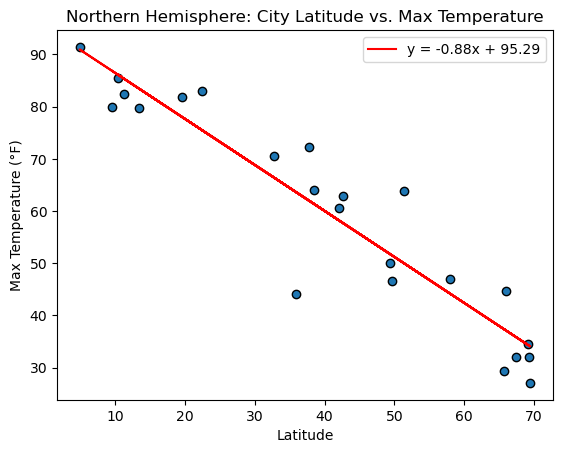

In [118]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

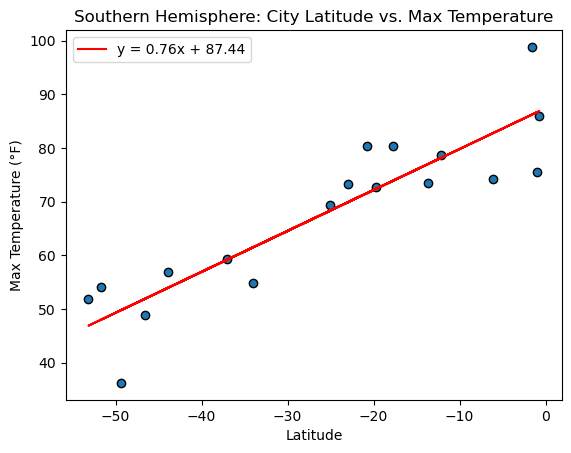

In [116]:
# Linear regression on Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


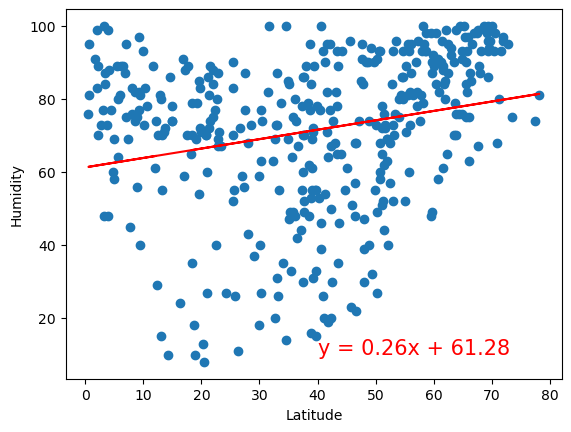

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


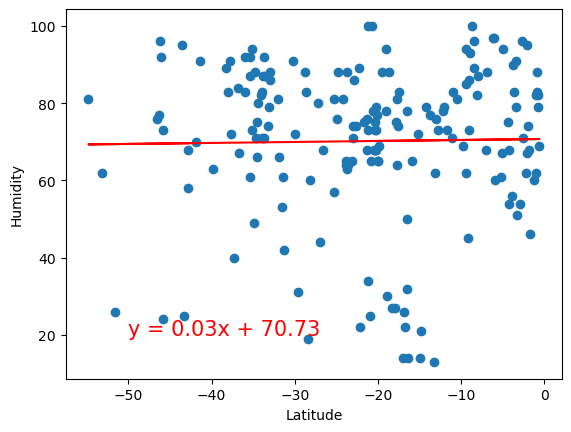

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

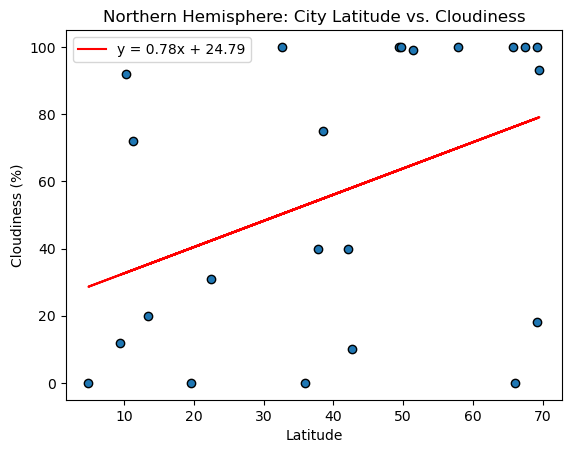

In [123]:
# Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()


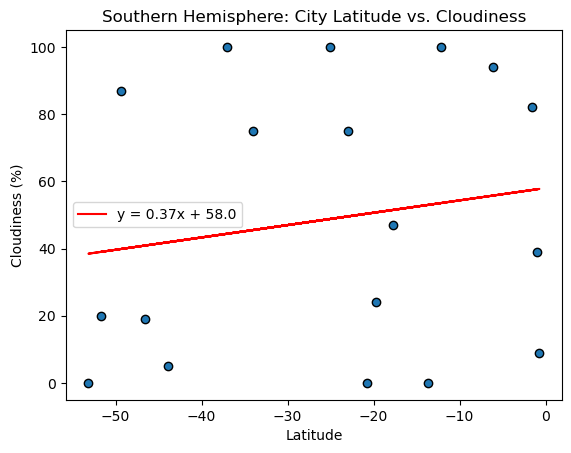

In [126]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


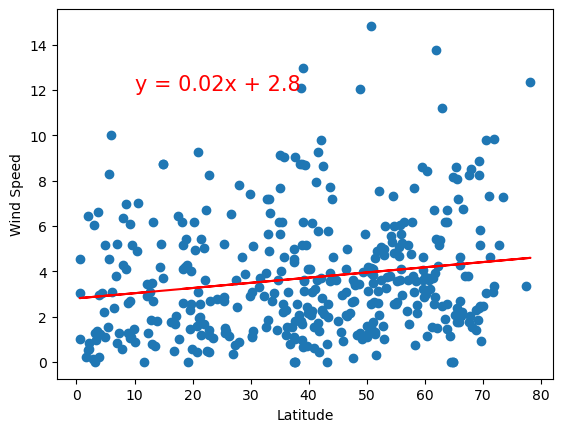

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


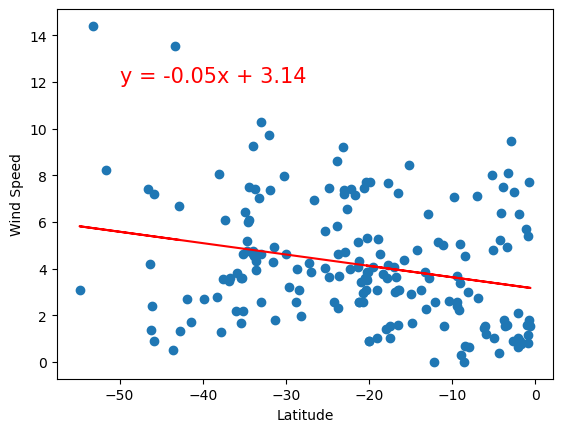

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE